# MACHINE LEARNING LAB

## EXERCISE 9

### Aim : 
1.Implement a neural network from scratch. Take any dataset. Run minimum 200 iterations and get the result. Use the gradient descent optimization technique for weight optimization.

2.For the same dataset, build a neural network using keras library. Run the same number
of epochs and compare the results obtained with your model vs the built-in keras
mode. 

### Algorithm :

1.  **Load and Preprocess the Dataset**:
   - Choose a dataset suitable for binary classification.
   - Preprocess the dataset by normalizing the features and encoding the labels if necessary.
   
2. **Initialize the Neural Network Class**:
   - Define a class `NeuralNetwork` with methods for initialization, forward propagation, backward propagation, training, prediction, and evaluation.

3. **Implement the Neural Network from Scratch**:
   - Define the architecture of the neural network including the number of layers, neurons in each layer, activation functions, loss function, and optimization technique (Gradient Descent).
   - Implement methods for weight initialization, activation functions (ReLU and Sigmoid), loss calculation (cross-entropy), and gradient descent optimization.

4. **Train the Neural Network from Scratch**:
   - Initialize an instance of the `NeuralNetwork` class.
   - Split the dataset into training and testing sets.
   - Train the neural network on the training data for a minimum of 200 iterations using gradient descent optimization.
   - Monitor the training loss and accuracy.

5. **Evaluate the Performance of the Scratch Model**:
   - Use the trained model to predict labels for the testing data.
   - Evaluate the accuracy and other performance metrics of the model.

6. **Build and Train a Neural Network using Keras**:
   - Use the Keras library to define a neural network with the same architecture as the one implemented from scratch.
   - Compile the model with appropriate loss function, optimizer (Gradient Descent), and metrics.
   - Train the Keras model on the same dataset for the same number of epochs as the scratch model.

7. **Compare the Results**:
   - Compare the accuracy and other metrics obtained from both models.

### Code and Output Part 1 : 

### Importing required libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [19]:
df=pd.read_csv(r"C:\Users\TEJU\Downloads\osteoporosis.csv")

In [20]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  1958 non-null   object
 12  Medical Conditions   1958 non-null   object
 13  Medications          1958 non-null   object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [22]:
df.drop(columns = ['Id'], inplace = True)

In [23]:
encoder = LabelEncoder()
for col in df.columns[1:-1]:
    df[col] = encoder.fit_transform(df[col].values)

df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,0,0,1,1,1,1,1,1,1,0,2,0,1,1
1,32,0,0,1,1,1,1,1,1,0,1,1,1,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,78,0,0,0,2,1,0,0,1,1,1,2,0,0,1
4,38,1,1,1,0,0,1,1,0,1,1,2,1,1,1


In [24]:
X=df.drop('Osteoporosis',axis=1)

In [25]:
y=df['Osteoporosis'].values.reshape(X.shape[0], 1)

### Splitting into training and testing dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Standardising

In [27]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### Neural Network from scratch

In [28]:
class NeuralNetwork():
    '''
    A two layer neural network having 
    - input layer ( 14 nodes)
    - hidden layer (8 nodes)
    - output layer (1 node) (binary classification)
    '''
        
    def __init__(self, layers=[14,8,1], lr=0.005, epochs=200):
        self.parameters = {}
        self.lr = lr
        self.epochs = epochs
        self.losses = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def parameter_init(self):
        '''
        Initialize the weights randomly using numpy
        W1- weights of the nodes in input layer (8,5)
        b1- biases of nodes in hidden layer
        W2- weights of the nodes in hidden layer (5,1)
        b2- biases of nodes in output layer
        '''
        np.random.seed(42) # Seed the random number generator
        self.parameters["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.parameters['b1']  =np.random.randn(self.layers[1],)
        self.parameters['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.parameters['b2'] = np.random.randn(self.layers[2],)
    
    def relu(self,Z):
        '''
        ReLU (Rectified Linear Unit)
        It will return the value passed to it if it is greater than zero; 
        otherwise, it returns zero.
        The weighter sum and bias term from the input layer is passed to this activation function
        '''
        return np.maximum(0,Z)

    def relu_der(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

    def eta(self, x):
        """
        When our neural network gives 0 value to log, this results in infinity which affects the training and loss becomes inf.
        To avoid this, if our value is 0, then it is replaced with an extremely small value"""
        ETA = 0.00000001
        return np.maximum(x, ETA)


    def sigmoid(self,Z):
        '''
        Sigmoid function
        Take a real number and squashes it to value between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))

    def entropy_loss(self,y, yhat):
        
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss

    def forward_propagation(self):
        #Performs the forward propagation
        
        Z1 = self.X.dot(self.parameters['W1']) + self.parameters['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.parameters['W2']) + self.parameters['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.parameters['Z1'] = Z1
        self.parameters['Z2'] = Z2
        self.parameters['A1'] = A1

        return yhat,loss

    def back_propagation(self,yhat):
        # Computes the derivatives and update weights and bias according.
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.parameters['W2'].T)
        dl_wrt_w2 = self.parameters['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.relu_der(self.parameters['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #gradient descent weight optimisation
        self.parameters['W1'] = self.parameters['W1'] - self.lr * dl_wrt_w1
        self.parameters['W2'] = self.parameters['W2'] - self.lr * dl_wrt_w2
        self.parameters['b1'] = self.parameters['b1'] - self.lr * dl_wrt_b1
        self.parameters['b2'] = self.parameters['b2'] - self.lr * dl_wrt_b2

    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.parameter_init() 

        for i in range(self.epochs):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.losses.append(loss)

    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.parameters['W1']) + self.parameters['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.parameters['W2']) + self.parameters['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred) 

    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.losses)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show() 

In [29]:
nn=NeuralNetwork() 
nn.fit(X_train, y_train)

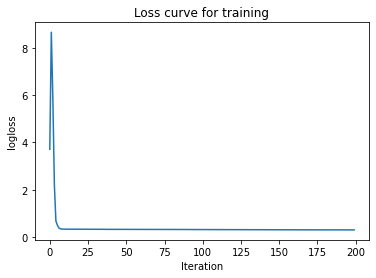

In [30]:
nn.plot_loss()

In [31]:
train_pred = nn.predict(X_train)
test_pred = nn.predict(X_test)

print("Train accuracy is {}".format(nn.acc(y_train, train_pred)))
print("Test accuracy is {}".format(nn.acc(y_test, test_pred)))

conf_matrix = confusion_matrix(y_test ,test_pred)
print(conf_matrix)

Train accuracy is 87
Test accuracy is 83
[[195  10]
 [ 54 133]]


C:\Users\TEJU\AppData\Local\Temp/ipykernel_13592/3831387372.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  acc = int(sum(y == yhat) / len(y) * 100)


## Code and Output Part 2 : 

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

C:\Users\TEJU\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df2=pd.read_csv(r"C:\Users\TEJU\Downloads\osteoporosis.csv")

In [3]:
df2.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [4]:
df2.drop(columns = ['Id'], inplace = True)

In [5]:
encoder = LabelEncoder()
for col in df2.columns[1:-1]:
    df2[col] = encoder.fit_transform(df2[col].values)

df2.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,0,0,1,1,1,1,1,1,1,0,2,0,1,1
1,32,0,0,1,1,1,1,1,1,0,1,1,1,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,78,0,0,0,2,1,0,0,1,1,1,2,0,0,1
4,38,1,1,1,0,0,1,1,0,1,1,2,1,1,1


In [6]:
X=df2.drop('Osteoporosis',axis=1)

In [7]:
y=df2['Osteoporosis'].values.reshape(X.shape[0], 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_train.shape

(1566, 14)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
ann = Sequential()
ann.add(Dense(units=14, activation='relu',
 input_dim=14))
ann.add(Dense(units=8, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

C:\Users\TEJU\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
ann.compile(optimizer='sgd', loss=
 'binary_crossentropy',
 metrics=['accuracy'])

In [13]:
history=ann.fit(X_train,y_train, epochs=200,batch_size=32)

Epoch 1/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5249 - loss: 0.7126 
Epoch 2/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5610 - loss: 0.6914
Epoch 3/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5914 - loss: 0.6661
Epoch 4/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6142 - loss: 0.6481
Epoch 5/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6667 - loss: 0.6284
Epoch 6/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6660 - loss: 0.6178
Epoch 7/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6877 - loss: 0.6088
Epoch 8/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6903 - loss: 0.5947
Epoch 9/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7182 - loss: 0.5809
Epoch 10/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7395 - loss: 0.5589
Epoch 11/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7550 - loss: 0.5309
Epoch 12/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [14]:
loss = history.history['loss']

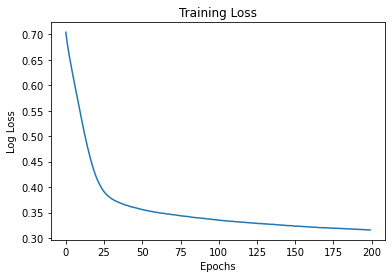

In [15]:
plt.plot(loss)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.show()

In [16]:
losstest, accuracy = ann.evaluate(X_test, y_test,verbose=0)

In [17]:
print("Test Loss:", losstest)
print("Test Accuracy:", accuracy)

Test Loss: 0.3878213167190552
Test Accuracy: 0.8214285969734192


## Comparative Analysis : 

Neural Networks implemented from scratch and using the keras library : 
- Used the same number of nodes in input, hidden and output layer (14,8,1)
- Used the same gradient descent optimisation for weights

From scratch : 
- Train set accuracy - 87
- Test set accuracy - 83

Using keras (tensorflow) library : 
- Train set accuracy - 85.9
- Test set accuracy - 82.1

Based on the provided data comparing the neural network implemented from scratch and using the Keras library:

1. **Performance Consistency**:
   - The accuracy achieved by the scratch implementation on both the train and test sets (87% and 83% respectively) is slightly higher than that achieved by the Keras implementation (85.9% and 82.1% respectively).
   - This consistency in performance suggests that the scratch implementation is effective in learning the underlying patterns in the data and generalizing well to unseen samples, comparable to the performance of the Keras library.

2. **Implementation Complexity vs. Performance**:
   - The scratch implementation requires more effort in terms of coding and understanding the underlying algorithms, but it achieves similar performance to the Keras library.
   - While the Keras library offers convenience and abstraction, allowing for faster prototyping and implementation, the scratch implementation provides a deeper understanding of neural network concepts and greater flexibility in customization.
   - Therefore, the choice between the two approaches depends on factors such as the trade-off between implementation complexity and performance consistency, as well as the specific requirements of the project.

Conclusion: 
In this particular scenario, the neural network implemented from scratch yielded better results. But it is possible that on improving the parameters (like using adam instead of sgd for optimisation and so on) could make the keras library neural network yield better results. 

### Results : 
Therefore, we were successfully able to implement a neural network using the tensorflow (keras) library as well as from scratch and draw insights from the same. 